In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:
7

In [25]:
class_to_num = {"Sub-Cycle Disturbance": 1, "Sag": 2}

In [3]:
#load full waveform data
final_waveform_df = pd.read_csv("final_waveform_summary.csv")
#perform type correction
type_correction = {'A': 'VAG', 'B': 'VBG', 'C': 'VCG', 'N': 'VNG', 'Van': 'VAG', 'Vbn': 'VBG', 'Vcn': 'VCG'}
for var in final_waveform_df['variable']:
    if var in type_correction:
        final_waveform_df.loc[final_waveform_df['variable'] == var, 'variable'] = type_correction[var]
final_waveform_df['variable'] = final_waveform_df['variable'].str.upper()
#filter the df to only inclue sub cycle disturbances and sags
final_waveform_df = final_waveform_df[final_waveform_df['class'].isin(["Sub-Cycle Disturbance", "Sag"])]
final_waveform_df = final_waveform_df[final_waveform_df['variable'].isin(['VAG', 'VBG', 'VCG', 'VNG'])]

In [4]:
len(final_waveform_df)

2064

In [5]:
print(final_waveform_df['variable'].unique())

['VCG' 'VAG' 'VBG']


In [80]:
# def plot_waveform(device_name, file_name, event_id, wide=False, final_waveform_df=final_waveform_df, tl_wide=0.45, th_wide=0.55, tl_narrow=0.46, th_narrow=0.54):
#     # Set variable and class values
#     variable = final_waveform_df.loc[
#         (final_waveform_df['device'] == device_name) &
#         (final_waveform_df['file'] == file_name) &
#         (final_waveform_df['event_id'] == event_id), 'variable'
#     ].values[0].upper()
#     _class = final_waveform_df.loc[
#         (final_waveform_df['device'] == device_name) &
#         (final_waveform_df['file'] == file_name) &
#         (final_waveform_df['event_id'] == event_id), 'class'
#     ].values[0]

#     # Set file path
#     file_path = os.path.join("Waveform_CSVs", directory_summary_dict[device_name], file_name + ".csv")
#     # Load dataframe for file
#     df = pd.read_csv(file_path)

#     print(f"Processing {_class} - {device_name} - {file_name} - {event_id}")
#     # Downsample Sub Cycle Disturbance data
#     if _class == "Sub-Cycle Disturbance":
#         print("Downsampling Sub-Cycle Disturbance data")
#         df = df.iloc[::2, :].reset_index(drop=True)

    

#     # Filter the time range
#     if wide:
#         df = df.loc[(df['time'] > tl_wide) & (df['time'] < th_wide), ['time', 'VAG', 'VBG', 'VCG']]
#     else:
#         df = df.loc[(df['time'] > tl_narrow) & (df['time'] < th_narrow), ['time', 'VAG', 'VBG', 'VCG']]

#     # Downsample Sag data only when the number of samples is greater than 1229
#     if _class == "Sag" and len(df) > 1229:
#         print("Downsampling Sag data")
#         df = df.iloc[::2, :].reset_index(drop=True)

#     print(f"No. of samples = {len(df)}")

#     # Check if the file is empty
#     if df.empty:
#         print(f"File {file_name} is empty")
#         return None

#     # Check if file is filled with zeros
#     if df[['VAG', 'VBG', 'VCG']].max().max() == 0 and df[['VAG', 'VBG', 'VCG']].min().min() == 0:
#         print(f"File {file_name} is filled with zeros")
#         return None

#     # Perform min-max normalization on the data
#     # scaler = MinMaxScaler(feature_range=(-1, 1))
#     # for col in ['VAG', 'VBG', 'VCG']:
#     #     df[col] = scaler.fit_transform(df[[col]])

#     # Plot the waveform
#     # plt.figure(figsize=(10, 6))
#     # for col in ['VAG', 'VBG', 'VCG']:
#     #     sns.lineplot(x=df['time'], y=df[col], label=col)
#     # plt.xlabel("Time (s)")
#     # plt.ylabel("Voltage")
#     # plt.legend()
#     # plt.title(f"{_class} - {variable}")
#     output_csv_file = f"{device_name}_{file_name}.csv"
#     df.to_csv(output_csv_file, index=False)
#     print(f"Exported dataframe to {output_csv_file}")
#     return None

#Original code for plotting the waveform
def plot_waveform(device_name, file_name, event_id, wide=False, final_waveform_df=final_waveform_df, tl_wide=0.45, th_wide=0.55, tl_narrow=0.46, th_narrow=0.54):
    # Set variable and class values
    variable = final_waveform_df.loc[
        (final_waveform_df['device'] == device_name) &
        (final_waveform_df['file'] == file_name) &
        (final_waveform_df['event_id'] == event_id), 'variable'
    ].values[0].upper()
    _class = final_waveform_df.loc[
        (final_waveform_df['device'] == device_name) &
        (final_waveform_df['file'] == file_name) &
        (final_waveform_df['event_id'] == event_id), 'class'
    ].values[0]
 
    # Set file path
    file_path = os.path.join("Waveform_CSVs", directory_summary_dict[device_name], file_name + ".csv")
    # Load dataframe for file
    df = pd.read_csv(file_path)
 
    print(f"Processing {_class} - {device_name} - {file_name} - {event_id}")
    # Downsample Sub Cycle Disturbance data
    if _class == "Sub-Cycle Disturbance":
        print("Downsampling Sub-Cycle Disturbance data")
        df = df.iloc[::2, :].reset_index(drop=True)
 
   
 
    # Filter the time range
    if wide:
        df = df.loc[(df['time'] > tl_wide) & (df['time'] < th_wide), ['time', variable]]
    else:
        df = df.loc[(df['time'] > tl_narrow) & (df['time'] < th_narrow), ['time', variable]]
 
    # Downsample Sag data only when the number of samples is greater than 1229
    if _class == "Sag" and len(df) > 1229:
        print("Downsampling Sag data")
        df = df.iloc[::2, :].reset_index(drop=True)
 
    print(f"No. of samples = {len(df)}")
 
    # Check if the file is empty
    if df.empty:
        print(f"File {file_name} is empty")
        return None
 
    # Check if file is filled with zeros
    if df[variable].max() == 0 and df[variable].min() == 0:
        print(f"File {file_name} is filled with zeros")
        return None
 
    # Perform min-max normalization on the data
    scaler = MinMaxScaler(feature_range=(-1, 1))
    df[variable] = scaler.fit_transform(df[[variable]])
 
    # Plot the waveform
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=df['time'], y=df[variable])
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage")
    # plt.title(f"{_class} - {variable}")
    return plt

In [55]:
#Sag VAG Narrow
plot_waveform("Non UPS load A", "wv0000000b", 15)
plot_waveform("Non UPS load A", "wv000000c4", 289)

Processing Sag - Non UPS load A - wv0000000b - 15
Downsampling Sag data
No. of samples = 1229
Exported dataframe to Non UPS load A_wv0000000b.csv
Processing Sag - Non UPS load A - wv000000c4 - 289
Downsampling Sag data
No. of samples = 1229
Exported dataframe to Non UPS load A_wv000000c4.csv


In [62]:
plot_waveform("Non UPS load A", "wv000000cb", 296, tl_narrow=0, th_narrow=0.08005)

Processing Sag - Non UPS load A - wv000000cb - 296
Downsampling Sag data
No. of samples = 1230
Exported dataframe to Non UPS load A_wv000000cb.csv


Processing Sag - Utility B - wv00000785 - 2351
No. of samples = 1229


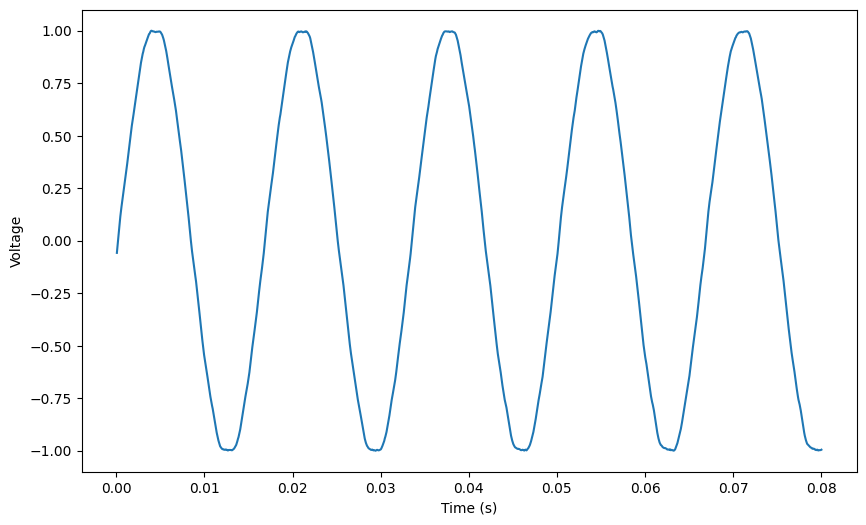

In [40]:
#Sag VAG Narrow
p3 = plot_waveform("Utility B", "wv00000785", 2351, tl_narrow = 0, th_narrow = 0.08005)
p3.show()

Processing Sub-Cycle Disturbance - UPS A input - wv00000186 - 674
Downsampling Sub-Cycle Disturbance data
No. of samples = 1229


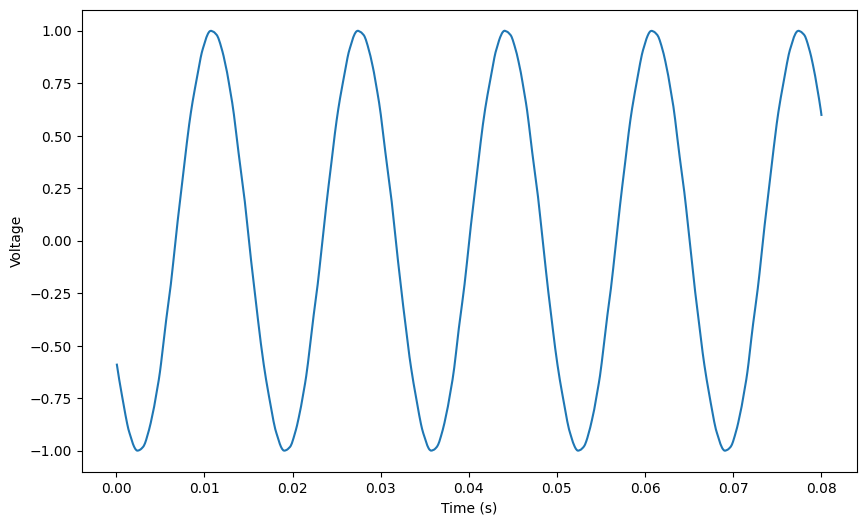

In [39]:
p1 =plot_waveform("UPS A input", "wv00000186", 674, tl_narrow = 0, th_narrow = 0.08005)
p1.show()

Processing Sub-Cycle Disturbance - UPS A output - wv00000005 - 4
No. of samples = 1229


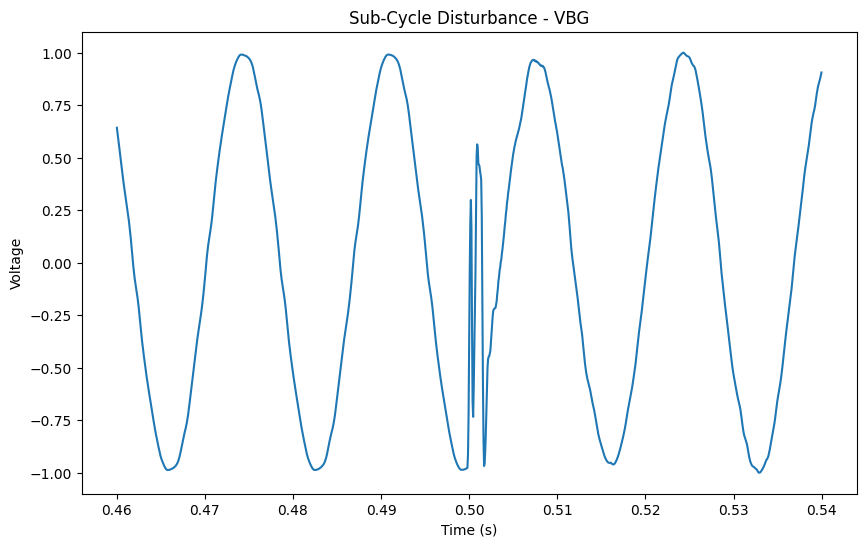

In [11]:
p = plot_waveform("UPS A output", "wv00000005", 4)
p.show()

Processing Sub-Cycle Disturbance - UPS A output - wv00000005 - 4
No. of samples = 1229


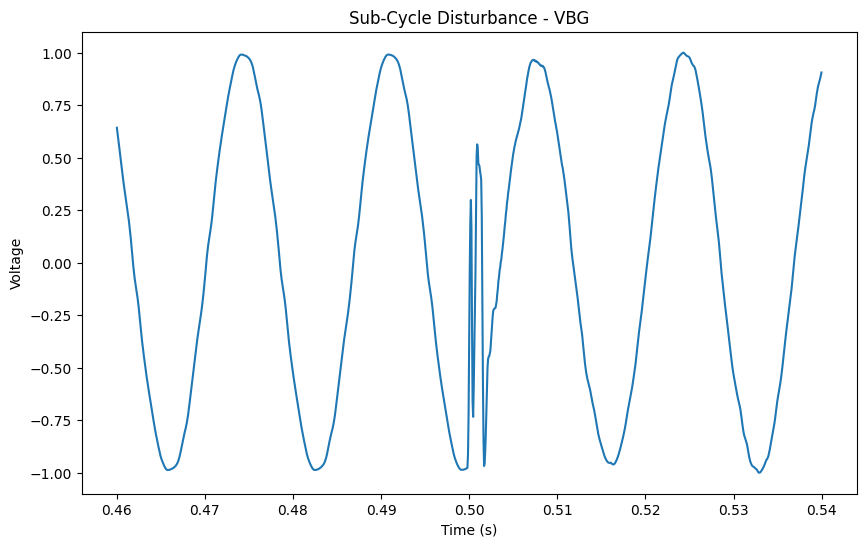

In [13]:
p = plot_waveform("UPS A output", "wv00000005", 4)
p.show()

Processing Sag - Utility B - wv00000791 - 2366
No. of samples = 1229


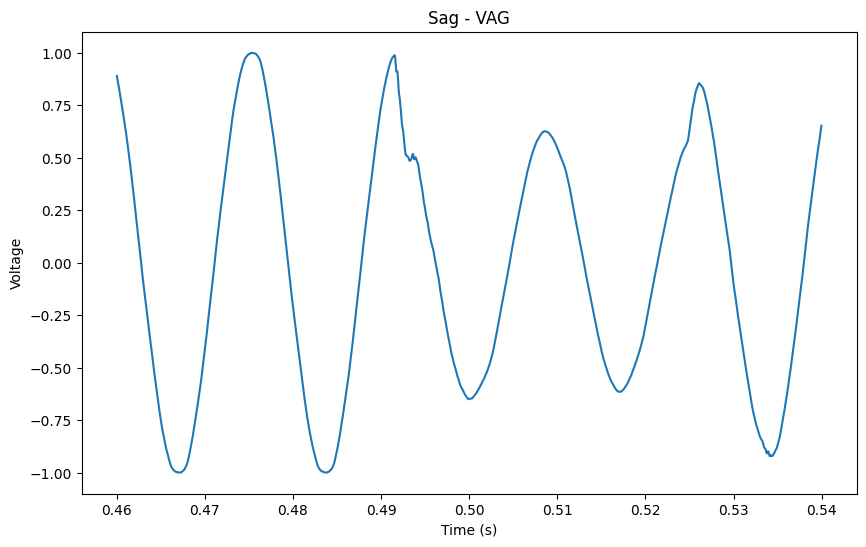

In [20]:
p3 = plot_waveform("Utility B", "wv00000791", 2366)
p3.show()

Processing Sub-Cycle Disturbance - UPS A input - wv000000fa - 505
Downsampling Sub-Cycle Disturbance data
No. of samples = 1229


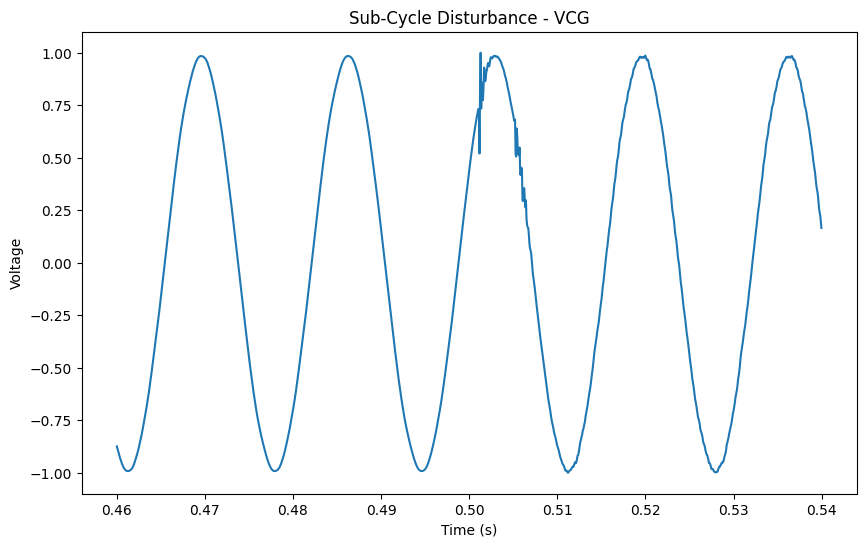

In [21]:
#Sub Cycle Disturbance - VCG
p3 = plot_waveform("UPS A input", "wv000000fa", 505)
p3.show()

922


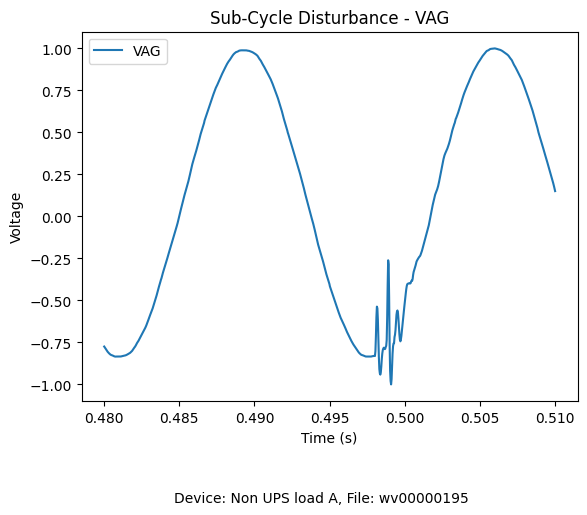

In [54]:
#Sub Cycle Disturbance - VAG
p3 = plot_waveform("Non UPS load A", "wv00000195", 513)
p3.show()

In [65]:
def board_csv(device_name, file_name, event_id, wide=False, final_waveform_df=final_waveform_df, tl_wide=0.45, th_wide=0.55, tl_narrow=0.46, th_narrow=0.54, healthy = False):

    #set variable and class values
    variable = final_waveform_df.loc[
        (final_waveform_df['device'] == device_name) & 
        (final_waveform_df['file'] == file_name) &
        (final_waveform_df['event_id'] == event_id), 'variable'
    ].values[0].upper()
    _class = final_waveform_df.loc[
        (final_waveform_df['device'] == device_name) & 
        (final_waveform_df['file'] == file_name) &
        (final_waveform_df['event_id'] == event_id), 'class'
    ].values[0]

    # Set file path
    file_path = os.path.join("Waveform_CSVs", directory_summary_dict[device_name], file_name + ".csv")
    # Load dataframe for file
    df = pd.read_csv(file_path)

    print(f"Processing {_class} - {device_name} - {file_name} - {event_id}")
    # Downsample Sub Cycle Disturbance data
    if _class == "Sub-Cycle Disturbance":
        print("Downsampling Sub-Cycle Disturbance data")
        df = df.iloc[::2, :].reset_index(drop=True)

    if healthy:
        tl_narrow = 0
        th_narrow = 0.08005
        tl_wide = 0
        th_wide = 0.08005
    

    # Filter the time range
    if wide:
        df = df.loc[(df['time'] > tl_wide) & (df['time'] < th_wide), ['time', variable]]
    else:
        df = df.loc[(df['time'] > tl_narrow) & (df['time'] < th_narrow), ['time', variable]]

    # Downsample Sag data only when the number of samples is greater than 1229
    if _class == "Sag" and len(df) > 1229:
        print("Downsampling Sag data")
        df = df.iloc[::2, :].reset_index(drop=True)

    print(f"No. of samples = {len(df)}")

    # Check if the file is empty
    if df.empty:
        print(f"File {file_name} is empty")
        return None

    # Check if file is filled with zeros
    if df[variable].max() == 0 and df[variable].min() == 0:
        print(f"File {file_name} is filled with zeros")
        return None

    # Perform min-max normalization on the data
    scaler = MinMaxScaler(feature_range=(-1, 1))
    df[variable] = scaler.fit_transform(df[[variable]])
    if healthy:
        return ['3'] + df[variable].tolist()

    return [class_to_num[_class]] + df[variable].tolist()


Save Graphs for Narrow Data

In [ ]:
plots = {}  # Dictionary to store plots
count = 0
for index, row in final_waveform_df.iterrows():
    if count > 500:
        break
    # Get variables from the row
    device_name = row['device']
    file_name = row['file']
    event_id = row['event_id']
    _class = row['class']

    # Plot the waveform
    plot_key = f"plt{index}"  # Unique key for each plot
    plots[plot_key] = plot_waveform(device_name, file_name, event_id, tl_narrow = 0, th_narrow = 0.08005)
    if plots[plot_key] is None:
        continue

    # Save the plot
    output_directory = os.path.join("moe_data", "Plots", "Healthy_500_2")
    os.makedirs(output_directory, exist_ok=True)
    output_filename = os.path.join(output_directory, f"{device_name} - {file_name}.png")
    plots[plot_key].savefig(output_filename)
    plots[plot_key].close()
    count+=1



Processing Sub-Cycle Disturbance - Non UPS load A - wv00000001 - 0
Downsampling Sub-Cycle Disturbance data
No. of samples = 1229
Processing Sub-Cycle Disturbance - Non UPS load A - wv00000002 - 1
Downsampling Sub-Cycle Disturbance data
No. of samples = 1229
Processing Sub-Cycle Disturbance - Non UPS load A - wv00000003 - 2
Downsampling Sub-Cycle Disturbance data
No. of samples = 1229
Processing Sub-Cycle Disturbance - Non UPS load A - wv00000004 - 3
Downsampling Sub-Cycle Disturbance data
No. of samples = 1229
File wv00000004 is filled with zeros
Processing Sub-Cycle Disturbance - Non UPS load A - wv00000004 - 4
Downsampling Sub-Cycle Disturbance data
No. of samples = 1229
File wv00000004 is filled with zeros
Processing Sag - Non UPS load A - wv00000004 - 5
Downsampling Sag data
No. of samples = 1230
Processing Sub-Cycle Disturbance - Non UPS load A - wv00000006 - 8
Downsampling Sub-Cycle Disturbance data
No. of samples = 1229
Processing Sub-Cycle Disturbance - Non UPS load A - wv00000

Save MOE Data as multiple csvs

In [ ]:
mega_list = []  # List to store all data
for index, row in final_waveform_df.iterrows():
    # Get variables from the row
    device_name = row['device']
    file_name = row['file']
    event_id = row['event_id']
    _class = row['class']

    # Get the waveform data
    waveform_data = board_csv(device_name, file_name, event_id)
    if waveform_data is None:
        continue

    # Append the data to the list
    if len(waveform_data) > 1230:
        mega_list.append(waveform_data[:1230])
    else:
        mega_list.append(waveform_data)




# for index, row in final_waveform_df.iterrows():
#     # Get variables from the row
#     device_name = row['device']
#     file_name = row['file']
#     event_id = row['event_id']
#     _class = row['class']

#     # Plot the waveform
#     plot_key = f"plt{index}"  # Unique key for each plot
#     plots[plot_key] = plot_waveform(device_name, file_name, event_id)
#     if plots[plot_key] is None:
#         continue

#     # Save the plot
#     output_directory = os.path.join("moe_data", "CSV", _class)
#     os.makedirs(output_directory, exist_ok=True)
#     output_filename = os.path.join(output_directory, f"{device_name} - {file_name}.png")
#     plots[plot_key].savefig(output_filename)
#     plots[plot_key].close()

Processing Sub-Cycle Disturbance - Non UPS load A - wv00000001 - 0
Downsampling Sub-Cycle Disturbance data
No. of samples = 1229
Processing Sub-Cycle Disturbance - Non UPS load A - wv00000002 - 1
Downsampling Sub-Cycle Disturbance data
No. of samples = 1229
Processing Sub-Cycle Disturbance - Non UPS load A - wv00000003 - 2
Downsampling Sub-Cycle Disturbance data
No. of samples = 1229
Processing Sub-Cycle Disturbance - Non UPS load A - wv00000004 - 3
Downsampling Sub-Cycle Disturbance data
No. of samples = 1229
Processing Sub-Cycle Disturbance - Non UPS load A - wv00000004 - 4
Downsampling Sub-Cycle Disturbance data
No. of samples = 1229
Processing Sag - Non UPS load A - wv00000004 - 5
Downsampling Sag data
No. of samples = 1229
Processing Sub-Cycle Disturbance - Non UPS load A - wv00000006 - 8
Downsampling Sub-Cycle Disturbance data
No. of samples = 1229
Processing Sub-Cycle Disturbance - Non UPS load A - wv00000007 - 9
Downsampling Sub-Cycle Disturbance data
No. of samples = 1229
Proc

In [30]:
import csv

# Specify the output CSV file name
output_csv_file = "mega_list_export.csv"

# Write each element of mega_list as a separate row in the CSV
with open(output_csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(mega_list)

print(f"Exported mega_list to {output_csv_file}")

Exported mega_list to mega_list_export.csv


In [ ]:
healthy_list = []
count = 0
for index, row in final_waveform_df.iterrows():
    if count > 500:
        break
    # Get variables from the row
    device_name = row['device']
    file_name = row['file']
    event_id = row['event_id']
    _class = row['class']

    # Get the waveform data
    waveform_data = board_csv(device_name, file_name, event_id, healthy=True)
    if waveform_data is None:
        continue

    # Append the data to the list
    if len(waveform_data) > 1230:
        healthy_list.append(waveform_data[:1230])
    else:
        healthy_list.append(waveform_data)
    count +=1
# Append healthy_list to the existing mega_list_export.csv
with open(output_csv_file, mode='a', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(healthy_list)

print(f"Appended healthy_list to {output_csv_file}")


Processing Sub-Cycle Disturbance - Non UPS load A - wv00000001 - 0
Downsampling Sub-Cycle Disturbance data
No. of samples = 1229
Processing Sub-Cycle Disturbance - Non UPS load A - wv00000002 - 1
Downsampling Sub-Cycle Disturbance data
No. of samples = 1229
Processing Sub-Cycle Disturbance - Non UPS load A - wv00000003 - 2
Downsampling Sub-Cycle Disturbance data
No. of samples = 1229
Processing Sub-Cycle Disturbance - Non UPS load A - wv00000004 - 3
Downsampling Sub-Cycle Disturbance data
No. of samples = 1229
File wv00000004 is filled with zeros
Processing Sub-Cycle Disturbance - Non UPS load A - wv00000004 - 4
Downsampling Sub-Cycle Disturbance data
No. of samples = 1229
File wv00000004 is filled with zeros
Processing Sag - Non UPS load A - wv00000004 - 5
Downsampling Sag data
No. of samples = 1230
Processing Sub-Cycle Disturbance - Non UPS load A - wv00000006 - 8
Downsampling Sub-Cycle Disturbance data
No. of samples = 1229
Processing Sub-Cycle Disturbance - Non UPS load A - wv00000

In [74]:
for i, l in enumerate(mega_list):
    if len(l) != 1230:
        print(f"{i}th index: Shit{len(l)}")

2063th index: Shit1231
2067th index: Shit1231
2072th index: Shit1231
2073th index: Shit1231
2074th index: Shit1231
2075th index: Shit1231
2076th index: Shit1231
2077th index: Shit1231
2078th index: Shit1231
2079th index: Shit1231
2080th index: Shit1231
2081th index: Shit1231
2082th index: Shit1231
2084th index: Shit1231
2085th index: Shit1231
2086th index: Shit1231
2087th index: Shit1231
2088th index: Shit1231
2106th index: Shit1231
2119th index: Shit1231
2129th index: Shit1231
2142th index: Shit1231
2143th index: Shit1231
2144th index: Shit1231
2145th index: Shit1231
2146th index: Shit1231
2147th index: Shit1231
2148th index: Shit1231
2149th index: Shit1231
2151th index: Shit1231
2152th index: Shit1231
2153th index: Shit1231
2154th index: Shit1231
2156th index: Shit1231
2163th index: Shit1231
2176th index: Shit1231
2177th index: Shit1231
2178th index: Shit1231
2179th index: Shit1231
2181th index: Shit1231
2182th index: Shit1231
2204th index: Shit1231
2221th index: Shit1231
2224th inde

In [82]:
len(healthy_list)

501

In [76]:
for i, l in enumerate(healthy_list):
    if len(l) != 1230:
        print(f"{i}th index: Shit{len(l)}")

3th index: Shit1229
7th index: Shit1229
12th index: Shit1229
13th index: Shit1229
14th index: Shit1229
15th index: Shit1229
16th index: Shit1229
17th index: Shit1229
18th index: Shit1229
19th index: Shit1229
20th index: Shit1229
21th index: Shit1229
22th index: Shit1229
24th index: Shit1229
25th index: Shit1229
26th index: Shit1229
27th index: Shit1229
28th index: Shit1229
46th index: Shit1229
59th index: Shit1229
69th index: Shit1229
82th index: Shit1229
83th index: Shit1229
84th index: Shit1229
85th index: Shit1229
86th index: Shit1229
87th index: Shit1229
88th index: Shit1229
89th index: Shit1229
91th index: Shit1229
92th index: Shit1229
93th index: Shit1229
94th index: Shit1229
96th index: Shit1229
103th index: Shit1229
116th index: Shit1229
117th index: Shit1229
118th index: Shit1229
119th index: Shit1229
121th index: Shit1229
122th index: Shit1229
144th index: Shit1229
161th index: Shit1229
164th index: Shit1229
166th index: Shit1229
167th index: Shit1229
168th index: Shit1229
18

In [78]:
x = [1,2,3,4]
print(x[:3])

[1, 2, 3]
